### Index No: 190072E
### Name    : E.M.D.A. Bandara

In [33]:
%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

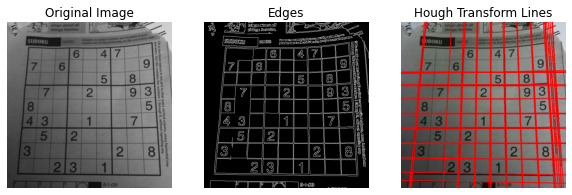

In [34]:
#Question 01
im  = cv.imread(r'images/sudoku.png', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize= 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 175 )

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)

    x0, y0 = a*rho, b*rho,
    x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
    x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
    cv.line(im, (x1, y1), (x2, y2), (0, 0, 255), 2)


fig, ax= plt.subplots(1, 3, figsize = (10, 10))

ax[0].imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
ax[1].set_title("Edges")
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[2].set_title("Hough Transform Lines")
ax[2].axis("off")

plt.show()

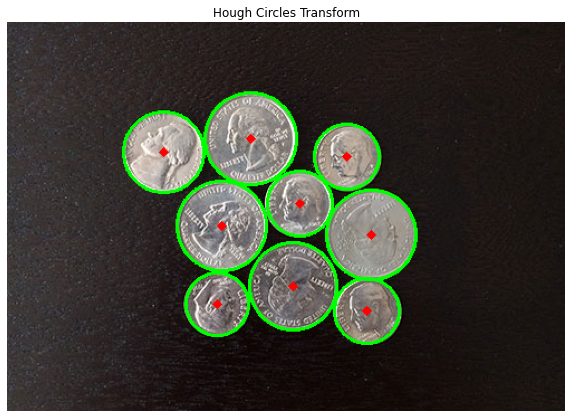

In [35]:
#Question 02
im  = cv.imread(r'images/coins.jpg', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50, param1=200, param2=60, minRadius=20, maxRadius=50)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)


fig, ax= plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.axis("off")
ax.set_title("Hough Circles Transform")

plt.show()

x=29.0,y=109.0,scale=1.0,orientation=0.0,p1=(4, 76),p2=(54, 141)


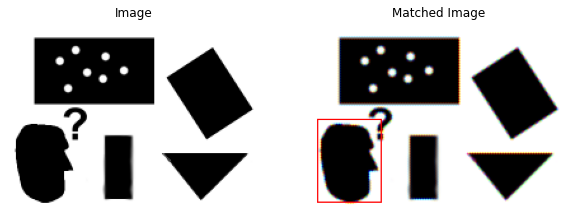

In [36]:
#Question 3
im = cv.imread(r'images/pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread(r'images/templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

assert im is not None
assert temp1 is not None

im_edges = cv.Canny(im,50,250)
temp1_edges = cv.Canny(temp1,50,250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im,cv.COLOR_BAYER_BG2BGR)
for x,y,scale,orientation in positions[0]:
    halfHeight = temp1.shape[0]/2.*scale
    halfWidth = temp1.shape[1]/2.*scale
    p1 = (int(x-halfWidth),int(y-halfHeight))
    p2 = (int(x+halfWidth),int(y+halfHeight))
    print("x={},y={},scale={},orientation={},p1={},p2={}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0,0,255))

fig, ax = plt.subplots(1,2,figsize=(10,5))    
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title("Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(out,cv.COLOR_BGR2RGB))
ax[1].set_title("Matched Image")
ax[1].axis('off')
plt.show()

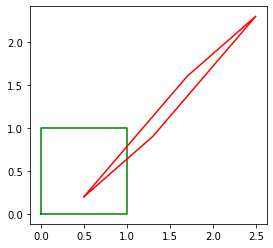

In [37]:
#Question 4

a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]

X = np.array([a, b, c, d]).T
theta = np.pi*30

s = 2
tx, ty = 0.5, 0.2

H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])
Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.4

A = np.array([[a11, a12, tx], [a21, a22, ty], [0, 0, 1]])
Y = A @ X

x = np.append(X[0,:] , X[0,0])
y = np.append(X[1,:], X[1,0])
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, color = 'g')
ax.set_aspect('equal')

x = np.append(Y[0,:] , Y[0,0])
y = np.append(Y[1,:], Y[1,0])
ax.plot(x, y, color = 'r')
ax.set_aspect('equal')

plt.show()

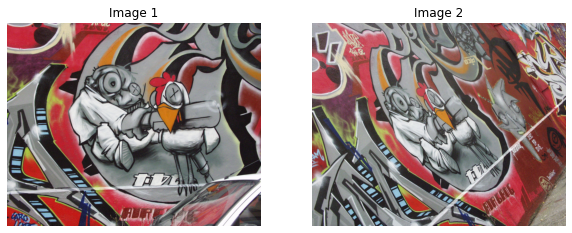

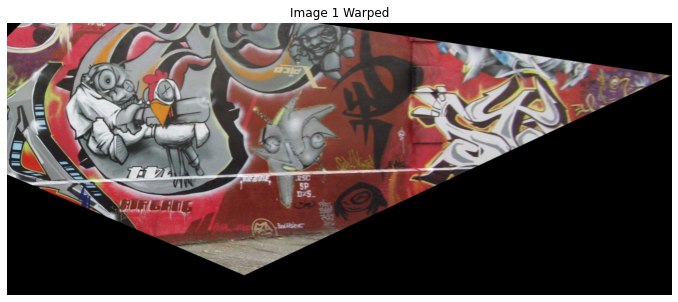

In [38]:
#Question 05

#Warping using the given homography
im1 = cv.imread('../HW_5/graf/img1.ppm',cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../HW_5/graf/img4.ppm',cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im4 is not None

with open('../HW_5/graf/H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])

im1to4 = cv.warpPerspective(im4,np.linalg.inv(H),(2200,900))
fig, ax = plt.subplots(1,2,figsize=(10,5))   

ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].set_title("Image 1")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(im4,cv.COLOR_BGR2RGB))
ax[1].set_title("Image 2")
ax[1].axis('off')

fig, ax = plt.subplots(1,1,figsize=(20,5)) 
ax.imshow(cv.cvtColor(im1to4,cv.COLOR_BGR2RGB))
ax.set_title("Image 1 Warped")
ax.axis('off')
plt.show()